## 0. Importing + Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Dataset: [DGA Domain Names](https://raw.githubusercontent.com/osunjio/applied_data_science_sidi/78e6da047845d071667bb887e28a5c120c8e6a12/data/dga_data_full.csv)

In [3]:
#!wget https://raw.githubusercontent.com/osunjio/applied_data_science_sidi/78e6da047845d071667bb887e28a5c120c8e6a12/data/dga_data_full.csv

saved 

In [4]:
# load dataset
df = pd.read_csv("../Dataset/dga_data.csv")
df

,isDGA,domain,host,subclass
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,dga,jpqftymiuver,jpqftymiuver.ru,cryptolocker
...,...,...,...,...
159995,legit,manhunt,manhunt.net,alexa
159996,legit,yupptv,yupptv.com,alexa
159997,legit,bbcmundo,bbcmundo.com,legit
159998,legit,kanogames,kanogames.com,legit


### Exploratory Data Analysis

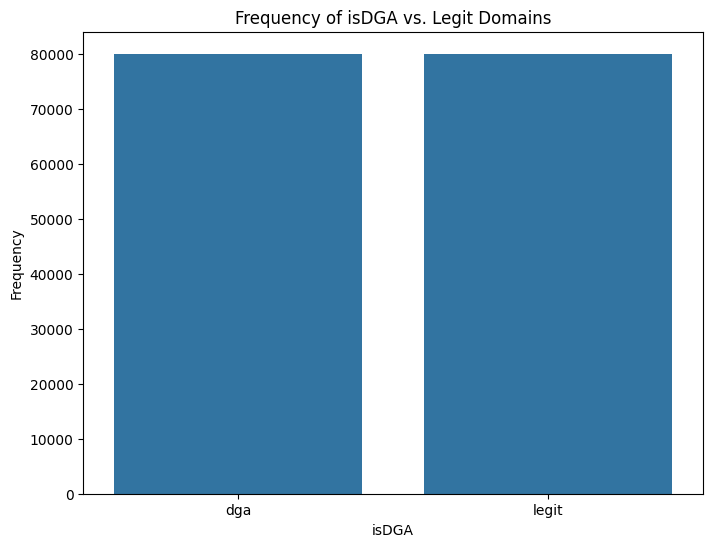

In [5]:
# prompt: visualize isDGA vs legit frequency

# Calculate the frequency of isDGA vs legit
dga_frequency = df['isDGA'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=dga_frequency.index, y=dga_frequency.values)
plt.title('Frequency of isDGA vs. Legit Domains')
plt.xlabel('isDGA')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x600 with 0 Axes>

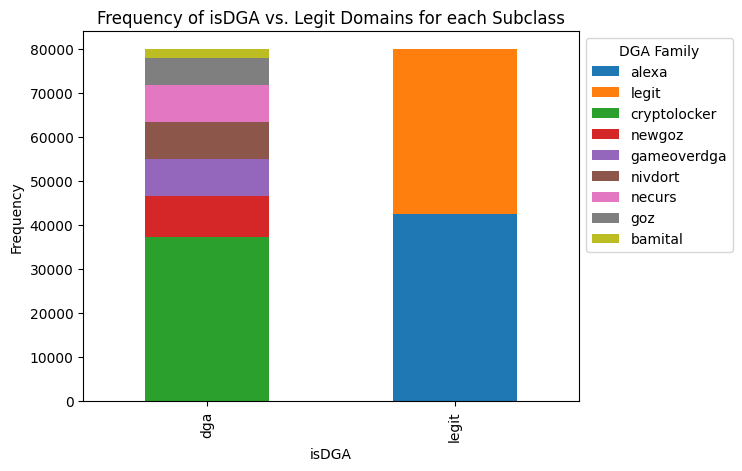

In [6]:
# prompt: visualize dga vs legit with each subclass as a legend in it, stacked please and sorted

# Calculate the frequency of isDGA vs legit for each subclass
dga_subclass_frequency = df.groupby(['isDGA', 'subclass'])['domain'].count().unstack()

# Sort the subclasses by frequency in descending order
dga_subclass_frequency = dga_subclass_frequency.reindex(dga_subclass_frequency.sum().sort_values(ascending=False).index, axis=1)


# Create a stacked bar plot
plt.figure(figsize=(12, 6))
dga_subclass_frequency.plot(kind='bar', stacked=True)
plt.title('Frequency of isDGA vs. Legit Domains for each Subclass')
plt.xlabel('isDGA')
plt.ylabel('Frequency')
plt.legend(title='DGA Family', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

In [7]:
# for rows where isDGA is legit and subclass is not legit
df[(df['isDGA'] == 'legit') & (df['subclass'] != 'legit')]

,isDGA,domain,host,subclass
80002,legit,clutchfans,clutchfans.net,alexa
80005,legit,marykayintouch,marykayintouch.com,alexa
80006,legit,droid,droid-life.com,alexa
80007,legit,polimi,polimi.it,alexa
80010,legit,goair,goair.in,alexa
...,...,...,...,...
159993,legit,paydollar,paydollar.com,alexa
159994,legit,travelpulse,travelpulse.com,alexa
159995,legit,manhunt,manhunt.net,alexa
159996,legit,yupptv,yupptv.com,alexa


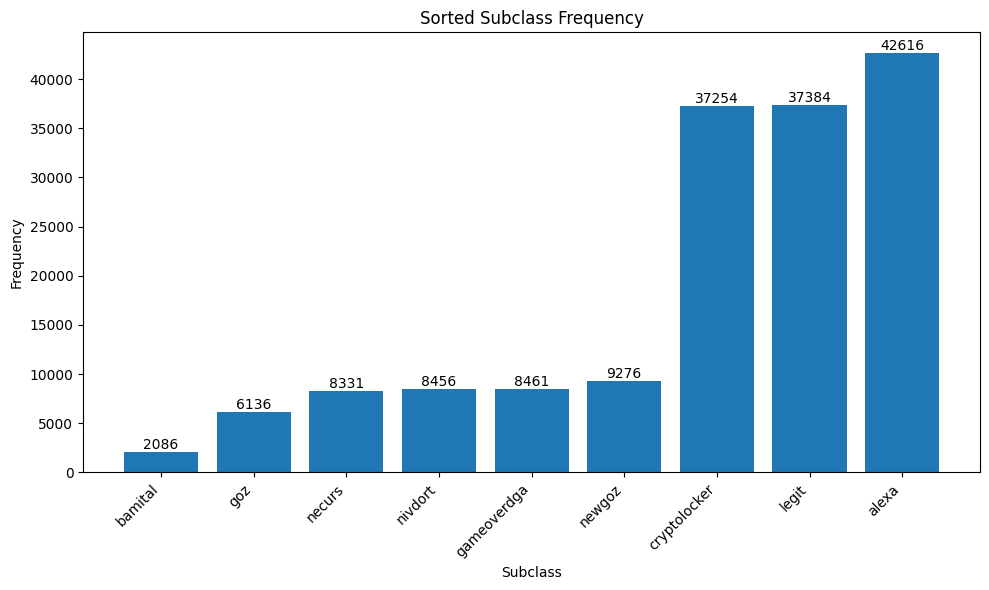

In [8]:
# prompt: visualize the sorted subclass frequency of df using vertical barchart with each frequency on the bar with 3 significant figures

# Assuming 'df' is your DataFrame and you have a column named 'subclass'
subclass_counts = df['subclass'].value_counts().sort_values()

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(subclass_counts.index, subclass_counts.values)

# Add frequency labels to the bars with 3 significant figures
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.xlabel('Subclass')
plt.ylabel('Frequency')
plt.title('Sorted Subclass Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [9]:
df[df["isDGA"]=="dga"]["subclass"].unique().tolist()

['gameoverdga',
 'cryptolocker',
 'newgoz',
 'nivdort',
 'goz',
 'necurs',
 'bamital']

### Oversampling Approach

In [10]:
# prompt: simplify df to just column domain and subclass

# Keep only the 'domain' and 'subclass' columns
sliced_df = df[['domain','host', 'subclass']]

sliced_df

,domain,host,subclass
0,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker
2,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker
3,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,jpqftymiuver,jpqftymiuver.ru,cryptolocker
...,...,...,...
159995,manhunt,manhunt.net,alexa
159996,yupptv,yupptv.com,alexa
159997,bbcmundo,bbcmundo.com,legit
159998,kanogames,kanogames.com,legit


In [11]:
original_df = sliced_df.copy()

In [12]:
original_df['host'] = original_df['host'].fillna('')
original_df['domain'] = original_df['domain'].fillna('')

sliced_df['domain'] = sliced_df['domain'].fillna('')

/var/folders/4y/fjdlkfl16r3bh9wx02cvd7_h0000gn/T/ipykernel_77761/2022476595.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_df['domain'] = sliced_df['domain'].fillna('')


In [13]:
!pip3.11 install tldextract


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip


In [14]:
import tldextract

# Sample DataFrame
# Extract TLD
sliced_df['tld'] = sliced_df['host'].apply(lambda x: tldextract.extract(x).suffix)

print(sliced_df)

                            domain                            host  \
0       6xzxsw3sokvg1tc752y1a6p0af  6xzxsw3sokvg1tc752y1a6p0af.com   
1                   glbtlxwwhbnpxs               glbtlxwwhbnpxs.ru   
2                   xxmamopyipbfpk               xxmamopyipbfpk.ru   
3        zfd5szpi18i85wj9uy13l69rg   zfd5szpi18i85wj9uy13l69rg.net   
4                     jpqftymiuver                 jpqftymiuver.ru   
...                            ...                             ...   
159995                     manhunt                     manhunt.net   
159996                      yupptv                      yupptv.com   
159997                    bbcmundo                    bbcmundo.com   
159998                   kanogames                   kanogames.com   
159999                   roadrover                    roadrover.cn   

            subclass  tld  
0        gameoverdga  com  
1       cryptolocker   ru  
2       cryptolocker   ru  
3             newgoz  net  
4       cryptolocke

#### Data Augmentation

As seen from the subclass frequency, 6 of the 7 DGA subclasses are massively underrepresented. And since imbalanced dataset also hurts our model's learning

In [15]:
tld_to_append = {}

for subclass in sliced_df['subclass'].unique():
    curr_tld = sliced_df[sliced_df['subclass']== subclass]['tld'].unique().tolist()
    tld_to_append[subclass] = curr_tld
sliced_df = sliced_df.drop('tld', axis=1)

In [16]:
# prompt: display one example from each subclass in ['gameoverdga',
#  'cryptolocker',
#  'newgoz',
#  'nivdort',
#  'goz',
#  'necurs',
#  'bamital']

target_subclasses = ['gameoverdga', 'cryptolocker', 'newgoz', 'nivdort', 'goz', 'necurs', 'bamital']

for subclass in target_subclasses:
  example_domain = sliced_df[sliced_df['subclass'] == subclass]['host'].iloc[0]
  print(f"Subclass: {subclass}, Example host: {example_domain}")

Subclass: gameoverdga, Example host: 6xzxsw3sokvg1tc752y1a6p0af.com
Subclass: cryptolocker, Example host: glbtlxwwhbnpxs.ru
Subclass: newgoz, Example host: zfd5szpi18i85wj9uy13l69rg.net
Subclass: nivdort, Example host: takenroll.net
Subclass: goz, Example host: rcdqeqmpxgdiuqombhuwcfu.ru
Subclass: necurs, Example host: sfmbdpnijlarq.cc
Subclass: bamital, Example host: 5df9d44072820ad6eaac91669f357fea.org


If we look at the examples of the subclasses above, we chose to do the following possible actions for all the subclasses except **nivdort**:
* swap_character()
* insert_character()
* delete_character()
* substitute_character()

The spirit of this is similar to BART's pretraining methodology: sentence-corruption.

In [17]:
import random
import string

# Higher probabilities for more aggressive augmentations
augment_probs = {
    'swap': 0.4,
    'insert': 0.35,
    'delete': 0.3,
    'substitute': 0.25,
}

# Function to forcefully apply augmentations aggressively
def data_augment(domain, num_augmentations, tld_to_append):
    augmented_domains = set()

    while len(augmented_domains) < num_augmentations:
        augmented_domain = domain
        applied = False  # Track if any augmentation is applied

        # Loop through augmentations and apply each based on probability
        for _ in range(2):  # Apply 2 augmentations per call
            if random.random() < augment_probs['swap']:
                augmented_domain = swap_characters(augmented_domain)
                applied = True

            if random.random() < augment_probs['insert']:
                augmented_domain = insert_character(augmented_domain)
                applied = True

            if random.random() < augment_probs['delete']:
                augmented_domain = delete_character(augmented_domain)
                applied = True

            if random.random() < augment_probs['substitute']:
                augmented_domain = substitute_character(augmented_domain)
                applied = True

        # Ensure at least one augmentation is applied
        random_tld = random.choice(tld_to_append)
        augmented_domain_with_tld = f"{augmented_domain}.{random_tld}"

        augmented_domains.add((augmented_domain, augmented_domain_with_tld))
        # Add to set of unique augmented domains
    return list(augmented_domains)

# Define forced augmentation to ensure at least one augmentation
def force_random_augmentation(domain):
    aug_type = random.choice(['swap', 'insert', 'delete', 'substitute'])
    if aug_type == 'swap':
        return swap_characters(domain)
    elif aug_type == 'insert':
        return insert_character(domain)
    elif aug_type == 'delete':
        return delete_character(domain)
    elif aug_type == 'substitute':
        return substitute_character(domain)

# Swap adjacent characters in the domain
def swap_characters(domain):
    if len(domain) > 1:
        idx = random.randint(0, len(domain) - 2)
        domain_list = list(domain)
        domain_list[idx], domain_list[idx + 1] = domain_list[idx + 1], domain_list[idx]
        return ''.join(domain_list)
    return domain

# Insert a random character at a random position
def insert_character(domain):
    idx = random.randint(0, len(domain) - 1)
    random_char = random.choice(string.ascii_lowercase + string.digits)
    return domain[:idx] + random_char + domain[idx:]

# Delete a random character from the domain
def delete_character(domain):
    if len(domain) > 1:
        idx = random.randint(0, len(domain) - 1)
        return domain[:idx] + domain[idx + 1:]
    return domain

# Substitute a random character in the domain with another
def substitute_character(domain):
    idx = random.randint(0, len(domain) - 1)
    random_char = random.choice(string.ascii_lowercase + string.digits)
    return domain[:idx] + random_char + domain[idx + 1:]


In [18]:
import pandas as pd

target_subclasses = ['gameoverdga', 'newgoz', 'goz', 'necurs', 'bamital']

# Define the number of augmentations for each subclass
num_augmentations = {subclass: 4 for subclass in target_subclasses}
num_augmentations['bamital'] = 15

# Create a list to hold all new rows
new_rows = []

# Iterate through each subclass and apply data augmentation
for subclass in target_subclasses:
    domains_to_augment = sliced_df[sliced_df['subclass'] == subclass]['domain'].tolist()
    tld = tld_to_append[subclass]
    # Generate augmented domains using list comprehension
    augmented_domains = [
        (augmented_domain, augmented_host)
        for domain in domains_to_augment
        for augmented_domain, augmented_host in data_augment(domain, num_augmentations[subclass],tld)
    ]

    # Prepare new rows for the DataFrame
    new_rows.extend([{'domain': augmented_domain, 'host': augmented_host, 'subclass': subclass} for augmented_domain, augmented_host in augmented_domains])

# Convert the list of new rows to a DataFrame and append it to the original DataFrame
if new_rows:
    new_df = pd.DataFrame(new_rows)
    sliced_df = pd.concat([sliced_df, new_df], ignore_index=True)

In [19]:
sliced_df

,domain,host,subclass
0,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker
2,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker
3,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,jpqftymiuver,jpqftymiuver.ru,cryptolocker
...,...,...,...
320101,3fbedec347a76e1b40fc124623302090,3fbedec347a76e1b40fc124623302090.org,bamital
320102,3fbeedc347a76e1b40f124623320090,3fbeedc347a76e1b40f124623320090.org,bamital
320103,3bekdec347af76e1b40fc124632302090,3bekdec347af76e1b40fc124632302090.org,bamital
320104,3fbedec347a76e1b40fc124623402090,3fbedec347a76e1b40fc124623402090.org,bamital


For **nivdort** specifically, it is quite apparent that it is a composition of two words in a fixed dictionary. and as such, we can augment more datas using these logic

* generate_nivdort()

To do so, we will look at the known domains, use a Language Model to help us identify the words used to build our dictionary. This dictionary then will be used to generate new nivdort samples

In [20]:
!pip3.11 install nltk


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip


In [21]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /Users/lhx/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [22]:
import pandas as pd
from nltk.corpus import words

# Set of valid English words (for validation purposes)
word_set = set(words.words())

# Function to process all rows and store words in a dictionary
def extract_words_from_rows(df, column_name):
    word_dict = {}

    # Iterate over each row in the dataframe
    for index, row in df.iterrows():
        concatenated_word = row[column_name]
        word1, word2 = split_concatenated_words(concatenated_word,word_set)

        # Add the words to the dictionary and count their occurrences
        if word1 and word2:
            word_dict[word1] = word_dict.get(word1, 0) + 1
            word_dict[word2] = word_dict.get(word2, 0) + 1

    return word_dict

In [23]:
# prompt: using the word_dict, generate new nivdort domains that are not duplicate of the known ones (meaning if word 1 and word 2 is contained in a specific domain, we dont use that pair)
import random
import math

def split_concatenated_words(concatenated_word, word_set):
    """Splits a concatenated word into two valid words based on a word set."""
    for i in range(1, len(concatenated_word)):
        word1, word2 = concatenated_word[:i], concatenated_word[i:]
        if word1 in word_set and word2 in word_set:
            return word1, word2
    return concatenated_word, None

def generate_nivdort_domains(word_dict, known_domains, num_domains=32000, max_attempts=50, overlap_tolerance=0.1):
    """Generates new Nivdort domains with a balanced approach between uniqueness and aggression."""

    word_set = set(word_dict.keys())
    known_word_pairs = {frozenset([split_concatenated_words(domain.split('.')[0], word_set)]) for domain in known_domains}

    # Track newly generated domains and avoid strict overlap with known pairs
    new_domains = []
    i, j = 0, 0

    while i < num_domains and j < max_attempts * num_domains:
        word1 = random.choice(list(word_dict.keys()))
        word2 = random.choice(list(word_dict.keys()))

        # Check the pair uniqueness with some tolerance
        word_pair = frozenset([word1, word2])
        overlap = sum(1 for pair in known_word_pairs if pair == word_pair) / len(known_word_pairs)

        if overlap <= overlap_tolerance:  # Allow slight overlap with known pairs
            domain = word1 + word2

            if domain not in known_domains and domain not in new_domains:
                new_domains.append(domain)
                known_word_pairs.add(word_pair)  # Add to avoid duplicate generation
                i += 1
        j += 1

    return new_domains



In [24]:
known_nivdort_domains = df[df['subclass'] == 'nivdort']['domain'].tolist()
print(known_nivdort_domains)

['takenroll', 'dreamdont', 'visitshot', 'mostjune', 'fairslow', 'triedlady', 'movemarch', 'drinkusual', 'caseought', 'takenshoe', 'dreamfind', 'wifelate', 'gladtell', 'thesethan', 'dreamfine', 'madehear', 'wronghurry', 'knowpeace', 'casegreen', 'threethrow', 'hillgold', 'whichback', 'milkjune', 'quickcloth', 'wrongtear', 'darkthan', 'equalaugust', 'whichcompe', 'wrongoctober', 'songfloor', 'spendwhere', 'hangseven', 'drinkgrow', 'whichsuch', 'thenought', 'wishmarry', 'groupback', 'yardgift', 'dutywrote', 'joinaunt', 'joinrest', 'takenlift', 'caseborn', 'feltgold', 'triedking', 'milksaturday', 'rockhigh', 'takenprice', 'sickpast', 'lookdance', 'joinhope', 'feltboat', 'groupmoon', 'wronghunt', 'withfind', 'spotleft', 'movedish', 'fairunder', 'mademail', 'lordshade', 'equalhigh', 'spendheight', 'humanfind', 'wifemine', 'looksome', 'quickborn', 'arivepull', 'wishgold', 'watchslow', 'dutykind', 'wifepure', 'feltought', 'signhour', 'ariveover', 'songwrote', 'saltworld', 'wifehand', 'darkcons

In [25]:
word_dict = extract_words_from_rows(df[df['subclass'] == 'nivdort'], 'domain')
print(len(list(word_dict.keys())))

368


In [26]:
# Example usage:
new_nivdort_domains = generate_nivdort_domains(word_dict, known_nivdort_domains, num_domains=32000)
# print("New Nivdort Domains:", new_nivdort_domains)

In [27]:
# prompt: send these nivdort_domains to sliced_df
tld = tld_to_append['nivdort']

# Create new rows for the DataFrame
new_nivdort_rows = [{'host': f'{domain}.{random.choice(tld)}','domain': domain, 'subclass': 'nivdort'} for domain in new_nivdort_domains]

# Convert the list of new rows to a DataFrame and append it to the original DataFrame
if new_nivdort_rows:
    new_nivdort_df = pd.DataFrame(new_nivdort_rows)
    sliced_df = pd.concat([sliced_df, new_nivdort_df], ignore_index=True)


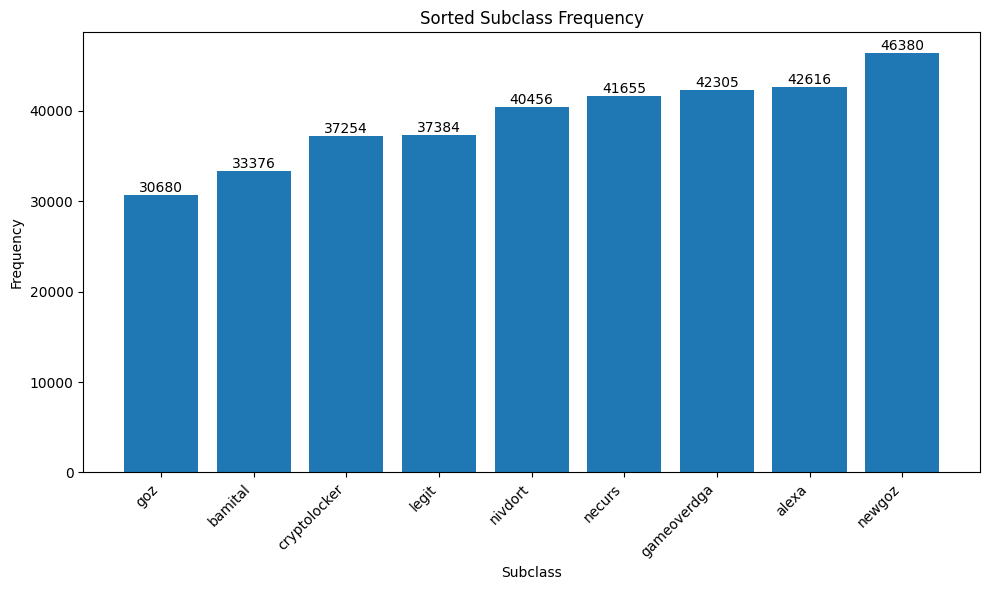

In [28]:
# prompt: visualize the sorted subclass frequency of sliced_df using vertical barchart with each frequency on the bar with 3 significant figures

# Assuming 'sliced_df' is your DataFrame
subclass_counts = sliced_df['subclass'].value_counts().sort_values()

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(subclass_counts.index, subclass_counts.values)

# Add frequency labels to the bars with 3 significant figures
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

plt.xlabel('Subclass')
plt.ylabel('Frequency')
plt.title('Sorted Subclass Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The original data is in `original_df`, whereas the oversampled data is in `sliced_df`

In [29]:
sliced_df = sliced_df.sample(frac=1).reset_index(drop=True)
original_df = original_df.sample(frac=1).reset_index(drop=True)

In [30]:
original_df

,domain,host,subclass
0,1hb8cs91x80rctvsxtp91ks942n,1hb8cs91x80rctvsxtp91ks942n.net,newgoz
1,dkgfnfxfxybkddj,dkgfnfxfxybkddj.ru,cryptolocker
2,vinmanager,vinmanager.com,legit
3,mrbymnijmvroqrsteidmaeifuodmt,mrbymnijmvroqrsteidmaeifuodmt.ru,goz
4,iugdsgvnbwiwlr,iugdsgvnbwiwlr.ru,cryptolocker
...,...,...,...
159995,1rfl2zm1pgwema1w0o0c01bh6fsr,1rfl2zm1pgwema1w0o0c01bh6fsr.net,gameoverdga
159996,sk,sk-gaming.com,alexa
159997,075dbdd03ff7d97279a986f4ca4878bb,075dbdd03ff7d97279a986f4ca4878bb.org,bamital
159998,nnconnect,nnconnect.com,legit


In [31]:
sliced_df

,domain,host,subclass
0,jvrcxwdatconzlrxotovqscupz,jvrcxwdatconzlrxotovqscupz.ru,goz
1,doverfermail,doverfermail.net,nivdort
2,funkypigeon,funkypigeon.com,legit
3,saltrock,saltrock.net,nivdort
4,bypovwclprhauloruxherxk,bypovwclprhauloruxherxk.ru,goz
...,...,...,...
352101,dvpadvolycadt,dvpadvolycadt.ac,necurs
352102,vwgmiwoewhdw,vwgmiwoewhdw.ru,cryptolocker
352103,y25r12hyt3dt1dg2hdh1umplt5,y25r12hyt3dt1dg2hdh1umplt5.net,newgoz
352104,ayklalxoqyhbkxhcpgc,ayklalxoqyhbkxhcpgc.cm,necurs


In [32]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [33]:
# compute entropy for domain and host
def compute_entropy(domain):

    sdomain = str(domain)

    freq = Counter(sdomain)
    total_length = len(sdomain)
    
    entropy = -sum((count / total_length) * np.log2(count / total_length) for count in freq.values())
    
    return entropy

original_df['domain_entropy'] = original_df['domain'].apply(compute_entropy)
original_df['host_entropy'] = original_df['host'].apply(compute_entropy)
sliced_df['host_entropy'] = sliced_df['host'].apply(compute_entropy)
sliced_df['domain_entropy'] = sliced_df['domain'].apply(compute_entropy)


compute entropy as most baseline model does not take in strings as input
directly encoded columns with typical encoding techniques (onehot, ordinal etc) not very useful in this case.
entropy is therefore more suitable feature to use for prediction

In [34]:
label_encoder = LabelEncoder()
original_df['subclass_encoded'] = label_encoder.fit_transform(original_df['subclass'])

# Apply the same encoder to the sliced DataFrame
sliced_df['subclass_encoded'] = label_encoder.transform(sliced_df['subclass'])

# Create and print the label mapping dictionary for reference
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'alexa': 0, 'bamital': 1, 'cryptolocker': 2, 'gameoverdga': 3, 'goz': 4, 'legit': 5, 'necurs': 6, 'newgoz': 7, 'nivdort': 8}


# Baseline model - Random Forest Classifier

# Use Both host and domain entropy (oversampled)
try both with and without feature selection

## with feature selection

In [36]:
# define X
X1 = sliced_df.drop(['domain', 'host', 'subclass','subclass_encoded'], axis=1)

# define y for binary and multiclass respectively
y1 = sliced_df['subclass_encoded']


In [37]:
# Initialize Random Forest and fit for feature selection
rf1 = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=20, random_state=42)
rf1.fit(X1, y1)

# Select features based on model importance
selector = SelectFromModel(rf1, prefit=True)
X1t = selector.transform(X1)

# Split into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1t, y1, test_size=0.2, random_state=42)

# Train the model on the resampled data
rf1.fit(X1_train, y1_train)

# Predict and get probability scores
y1_pred = rf1.predict(X1_test)
y1_pred_proba = rf1.predict_proba(X1_test)


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


chose most important feature, aka the domain

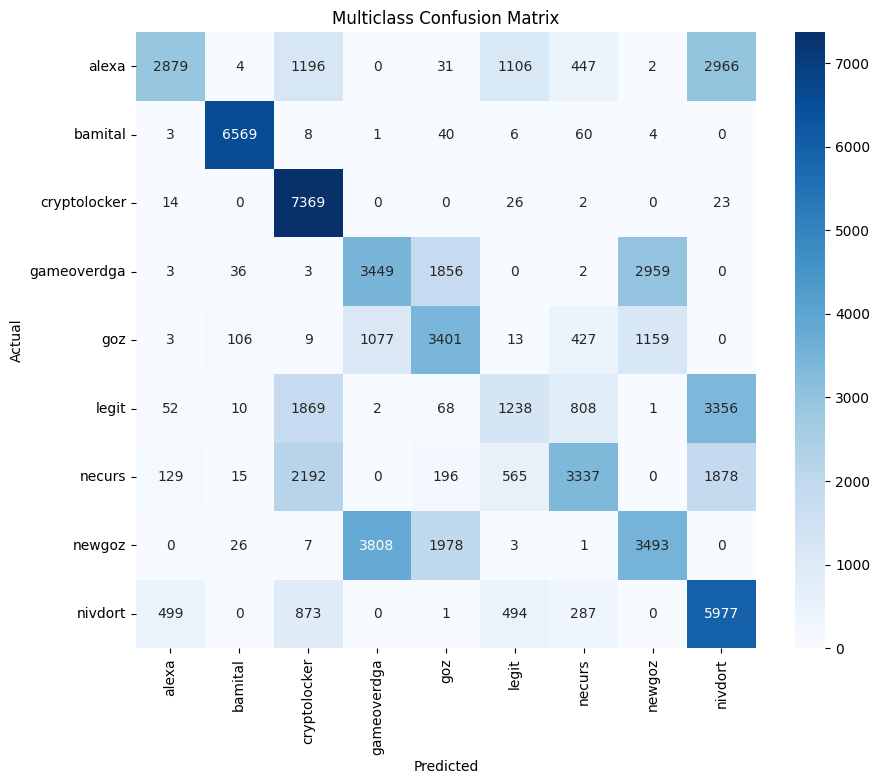

In [38]:
c1 = confusion_matrix(y1_test, y1_pred, labels=list(label_mapping.values()))

# Set up labels using the mapping
class_labels = [key for key in label_mapping.keys()]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(c1, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multiclass Confusion Matrix')

plt.show()

In [39]:
y1_test_binarized = label_binarize(y1_test, classes=np.unique(y1_test))
n_classes = y1_test_binarized.shape[1]



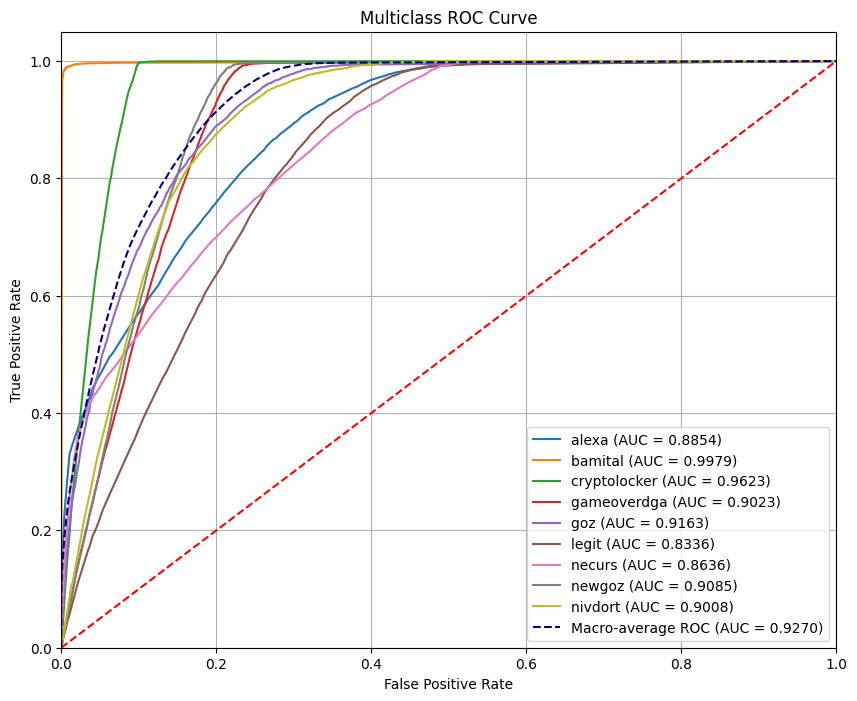

In [40]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y1_test_binarized[:, i], y1_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y1_test_binarized.ravel(), y1_pred_proba.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.4f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='--', label=f'Macro-average ROC (AUC = {roc_auc["macro"]:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()

# Show the plot
plt.show()

In [41]:
accuracy = accuracy_score(y1_test, y1_pred)

precision = precision_score(y1_test, y1_pred, average="macro")
f1 = f1_score(y1_test, y1_pred, average="macro")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro Avg): {precision:.4f}")
print(f"F1 Score (Macro Avg): {f1:.4f}")

Accuracy: 0.5355
Precision (Macro Avg): 0.5602
F1 Score (Macro Avg): 0.5248


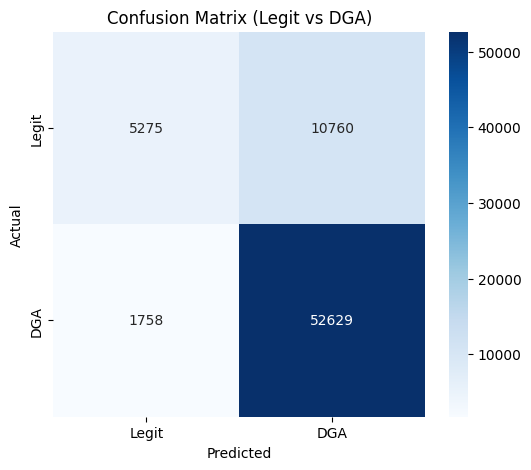

In [42]:
def categorize_labels(labels):
    return ['Legit' if label in [0, 5] else 'DGA' for label in labels]

# Apply the mapping function to both actual and predicted labels
y1_test_mapped = categorize_labels(y1_test)
y1_pred_mapped = categorize_labels(y1_pred)

# Compute the confusion matrix for the categorized labels
c1 = confusion_matrix(y1_test_mapped, y1_pred_mapped, labels=['Legit', 'DGA'])

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(c1, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legit', 'DGA'], 
            yticklabels=['Legit', 'DGA'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Legit vs DGA)')

plt.show()

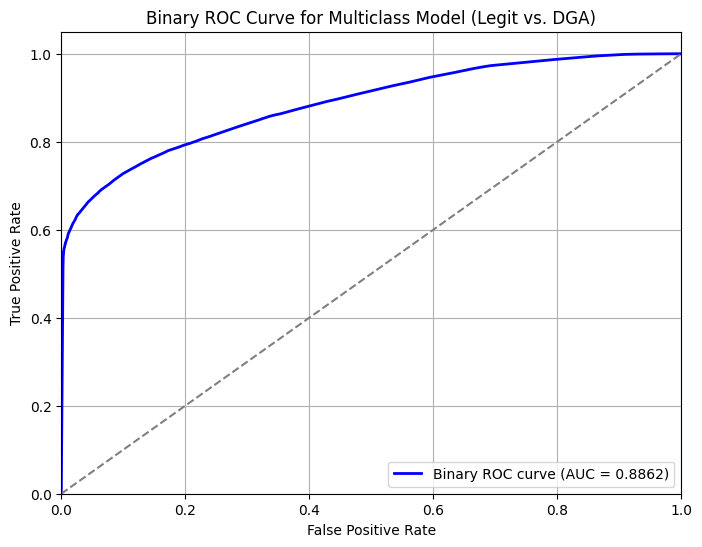

In [43]:
y_test_binary = [1 if label not in [0, 5] else 0 for label in y1_test]  # 'alexa' (0) and 'legit' (5) are 'Legit'

# 2. Calculate binary probabilities: sum probabilities for 'Legit' classes
# Assuming y_pred_proba is the predicted probability matrix from the model
legit_prob = y1_pred_proba[:, 0] + y1_pred_proba[:, 5]  # Probabilities for 'alexa' and 'legit'
dga_prob = 1 - legit_prob  # The remaining probability is for 'DGA'

# 3. Compute ROC curve and AUC for binary classification
fpr, tpr, _ = roc_curve(y_test_binary, dga_prob)
roc_auc = auc(fpr, tpr)

# 4. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Binary ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Binary ROC Curve for Multiclass Model (Legit vs. DGA)')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

In [44]:
positive_label = 'Legit'

# Calculate the metrics with explicit pos_label for binary classification
accuracy = accuracy_score(y1_test_mapped, y1_pred_mapped)
precision = precision_score(y1_test_mapped, y1_pred_mapped, pos_label=positive_label)
f1 = f1_score(y1_test_mapped, y1_pred_mapped, pos_label=positive_label)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8222
Precision: 0.7500
F1 Score: 0.4573


this only chooses the most important feature - domain entropy therefore result similar to when only domain entropy were used (as tested below). 

## without feature selection

In [45]:
# Initialize Random Forest 
rf1a = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=20, random_state=42)

# Split into training and testing sets
X1a_train, X1a_test, y1a_train, y1a_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train the model on the resampled data
rf1a.fit(X1a_train, y1a_train)

# Predict and get probability scores
y1a_pred = rf1a.predict(X1a_test)
y1a_pred_proba = rf1a.predict_proba(X1a_test)

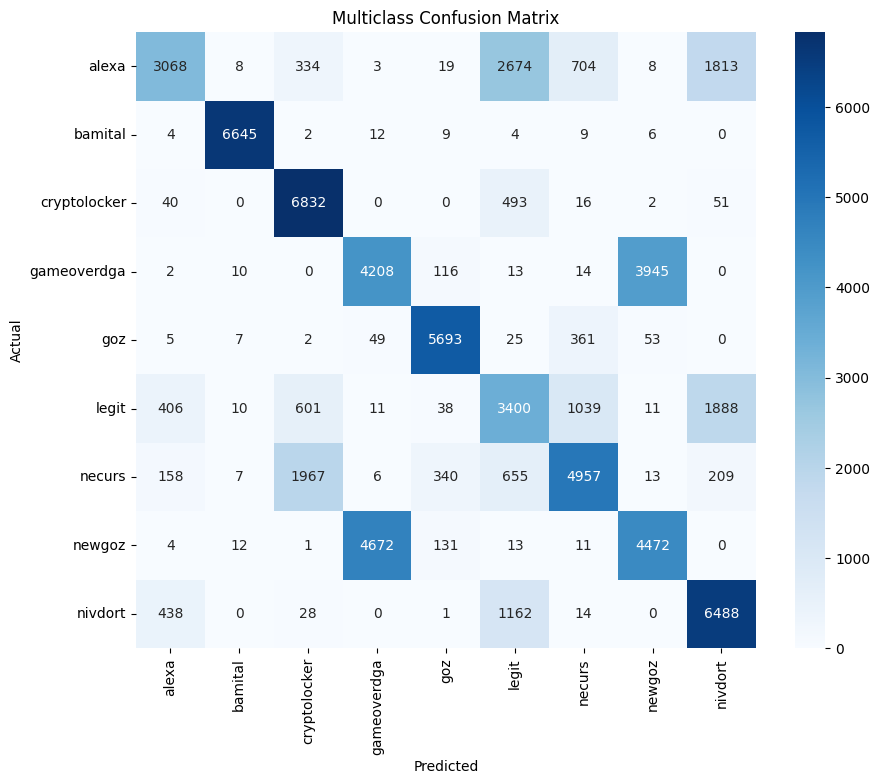

In [46]:
c1a = confusion_matrix(y1a_test, y1a_pred, labels=list(label_mapping.values()))

# Set up labels using the mapping
class_labels = [key for key in label_mapping.keys()]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(c1a, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multiclass Confusion Matrix')

plt.show()

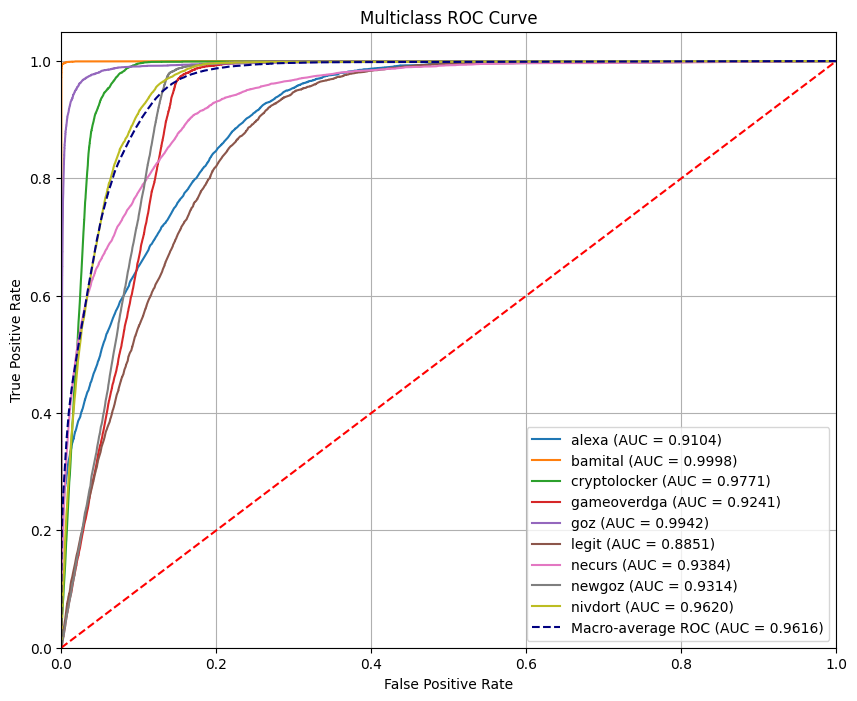

In [47]:
y1a_test_binarized = label_binarize(y1a_test, classes=np.unique(y1a_test))
n_classes = y1a_test_binarized.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y1a_test_binarized[:, i], y1a_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y1a_test_binarized.ravel(), y1a_pred_proba.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.4f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='--', label=f'Macro-average ROC (AUC = {roc_auc["macro"]:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()

# Show the plot
plt.show()

In [48]:
accuracy = accuracy_score(y1a_test, y1a_pred)

precision = precision_score(y1a_test, y1a_pred, average="macro")
f1 = f1_score(y1a_test, y1a_pred, average="macro")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro Avg): {precision:.4f}")
print(f"F1 Score (Macro Avg): {f1:.4f}")

Accuracy: 0.6498
Precision (Macro Avg): 0.6719
F1 Score (Macro Avg): 0.6594


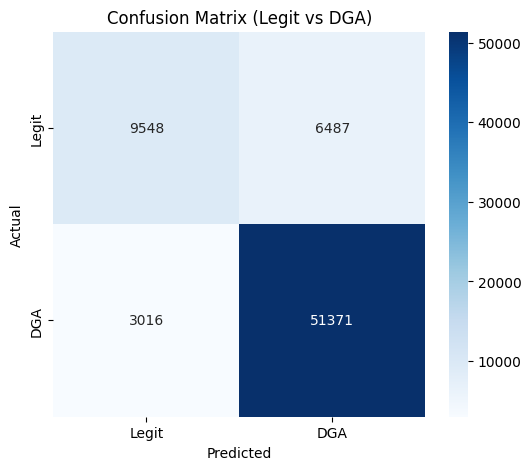

In [49]:
def categorize_labels(labels):
    return ['Legit' if label in [0, 5] else 'DGA' for label in labels]

# Apply the mapping function to both actual and predicted labels
y1a_test_mapped = categorize_labels(y1a_test)
y1a_pred_mapped = categorize_labels(y1a_pred)

# Compute the confusion matrix for the categorized labels
c1a = confusion_matrix(y1a_test_mapped, y1a_pred_mapped, labels=['Legit', 'DGA'])

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(c1a, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legit', 'DGA'], 
            yticklabels=['Legit', 'DGA'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Legit vs DGA)')

plt.show()

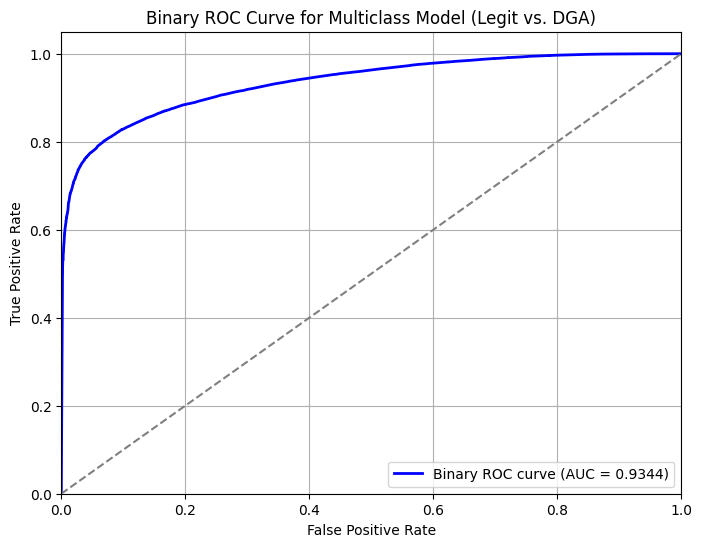

In [50]:
y_test_binary = [1 if label not in [0, 5] else 0 for label in y1a_test]  # 'alexa' (0) and 'legit' (5) are 'Legit'

# 2. Calculate binary probabilities: sum probabilities for 'Legit' classes
# Assuming y_pred_proba is the predicted probability matrix from the model
legit_prob = y1a_pred_proba[:, 0] + y1a_pred_proba[:, 5]  # Probabilities for 'alexa' and 'legit'
dga_prob = 1 - legit_prob  # The remaining probability is for 'DGA'

# 3. Compute ROC curve and AUC for binary classification
fpr, tpr, _ = roc_curve(y_test_binary, dga_prob)
roc_auc = auc(fpr, tpr)

# 4. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Binary ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Binary ROC Curve for Multiclass Model (Legit vs. DGA)')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

In [51]:
positive_label = 'Legit'

# Calculate the metrics with explicit pos_label for binary classification
accuracy = accuracy_score(y1a_test_mapped, y1a_pred_mapped)
precision = precision_score(y1a_test_mapped, y1a_pred_mapped, pos_label=positive_label)
f1 = f1_score(y1a_test_mapped, y1a_pred_mapped, pos_label=positive_label)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8651
Precision: 0.7599
F1 Score: 0.6677


results for both multiclass and binary is better than with feature selection, inferring that it is better to use both domain and host entropy as X for better result for random forest classifier (which )

## with SMOTE

In [52]:
smote = SMOTE(random_state=42)
rf1b = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=20, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X1a_train, y1a_train)
rf1b.fit(X_resampled, y_resampled)
y1b_pred = rf1b.predict(X1a_test)
y1b_pred_proba = rf1b.predict_proba(X1a_test)


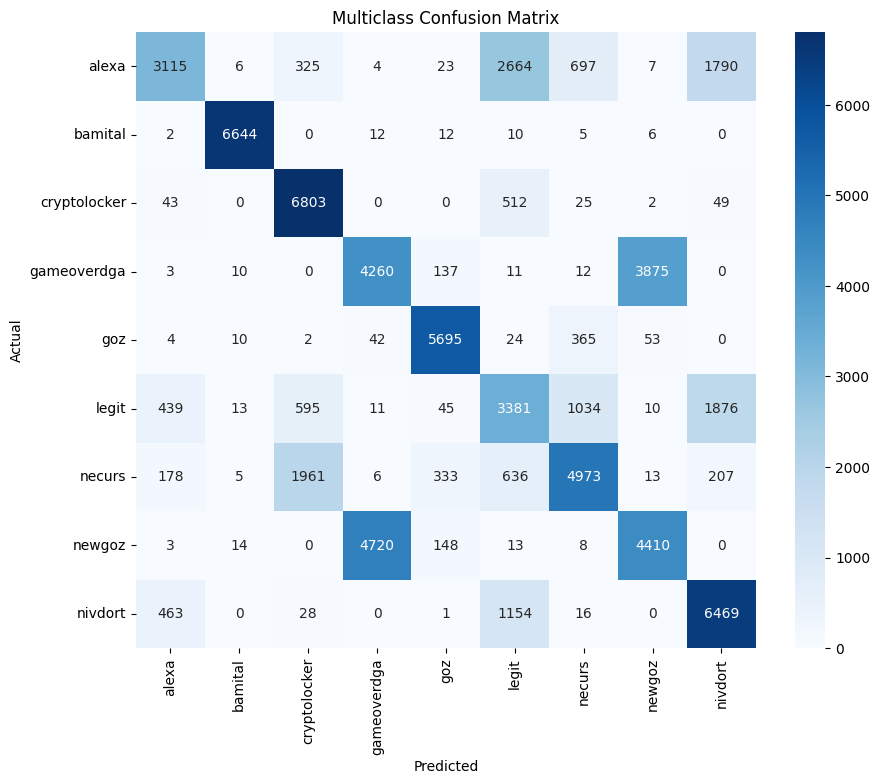

In [53]:
c1b = confusion_matrix(y1a_test, y1b_pred, labels=list(label_mapping.values()))

# Set up labels using the mapping
class_labels = [key for key in label_mapping.keys()]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(c1b, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multiclass Confusion Matrix')

plt.show()

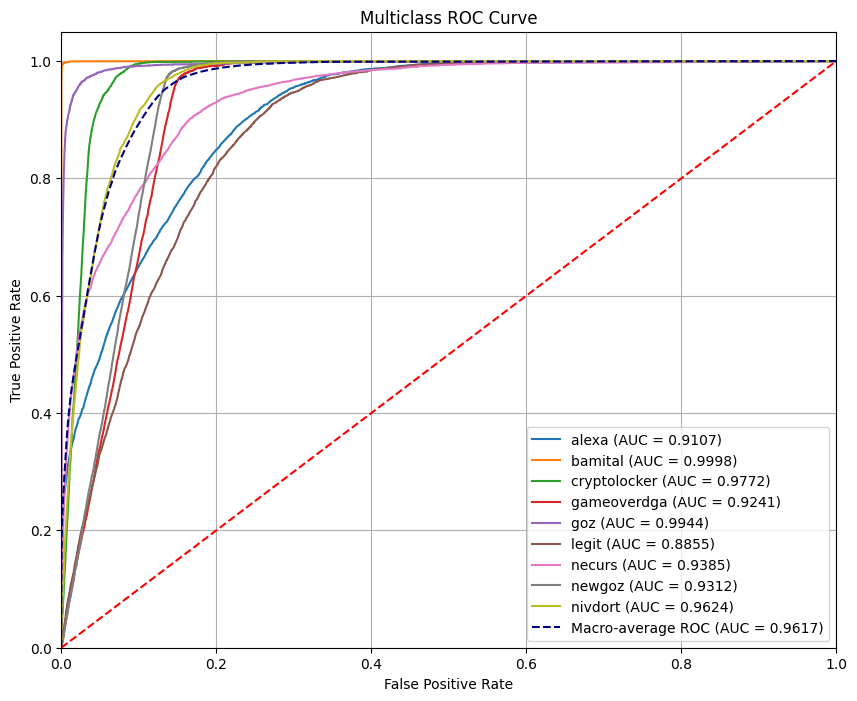

In [54]:
y1a_test_binarized = label_binarize(y1a_test, classes=np.unique(y1a_test))
n_classes = y1a_test_binarized.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y1a_test_binarized[:, i], y1b_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y1a_test_binarized.ravel(), y1b_pred_proba.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.4f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='--', label=f'Macro-average ROC (AUC = {roc_auc["macro"]:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()

# Show the plot
plt.show()

In [55]:
accuracy = accuracy_score(y1a_test, y1b_pred)

precision = precision_score(y1a_test, y1b_pred, average="macro")
f1 = f1_score(y1a_test, y1b_pred, average="macro")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro Avg): {precision:.4f}")
print(f"F1 Score (Macro Avg): {f1:.4f}")

Accuracy: 0.6497
Precision (Macro Avg): 0.6705
F1 Score (Macro Avg): 0.6593


difference not significant. not useful maybe because the imbalanced in oversampled data is not significant.

# Use host entropy only (oversampled)

In [56]:
# define X
X11 = sliced_df.drop(['domain', 'host', 'subclass','subclass_encoded', 'domain_entropy'], axis=1)


In [57]:
# Initialize Random Forest
rf11 = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=20, random_state=42)

# Split into training and testing sets
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y1, test_size=0.2, random_state=42)

# Train the model on the resampled data
rf11.fit(X11_train, y11_train)

# Predict and get probability scores
y11_pred = rf11.predict(X11_test)
y11_pred_proba = rf11.predict_proba(X11_test)

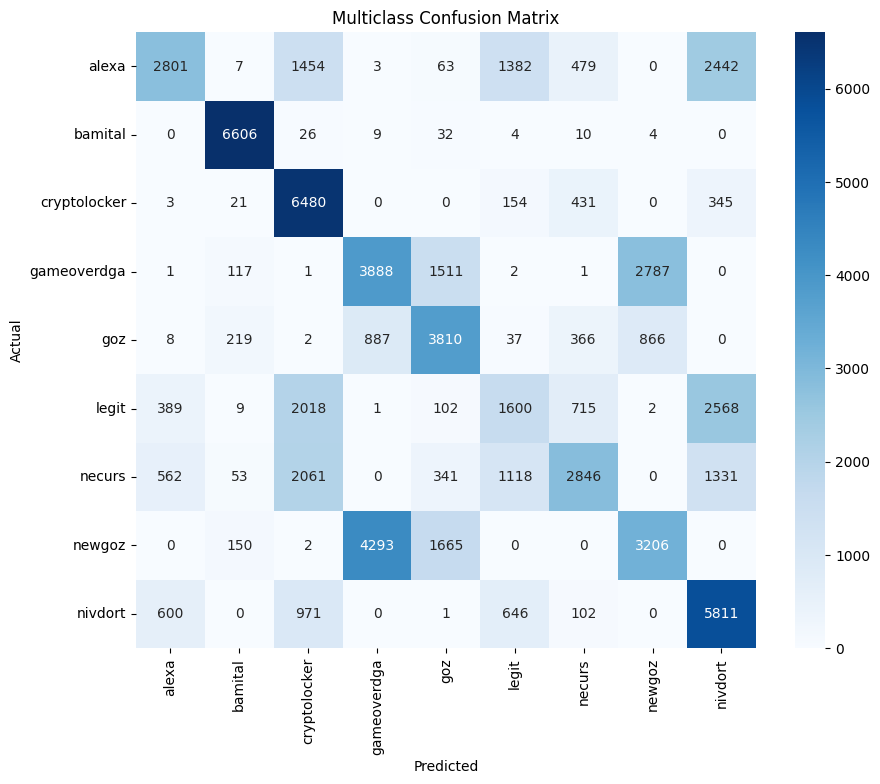

In [58]:
c11 = confusion_matrix(y11_test, y11_pred, labels=list(label_mapping.values()))

# Set up labels using the mapping
class_labels = [key for key in label_mapping.keys()]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(c11, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multiclass Confusion Matrix')

plt.show()

In [59]:
y11_test_binarized = label_binarize(y11_test, classes=np.unique(y11_test))
n_classes = y11_test_binarized.shape[1]

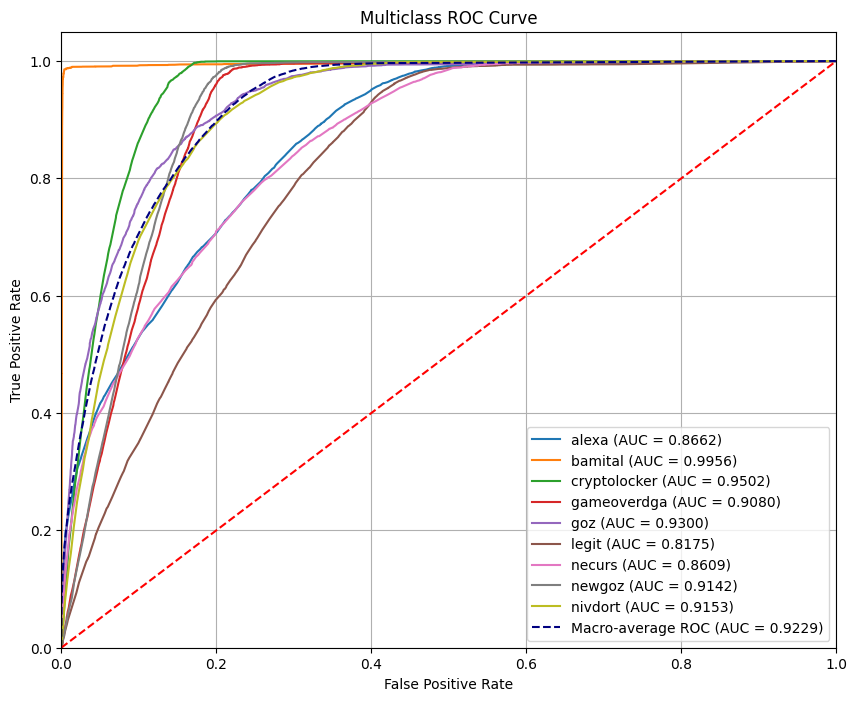

In [60]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y11_test_binarized[:, i], y11_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y11_test_binarized.ravel(), y11_pred_proba.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.4f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='--', label=f'Macro-average ROC (AUC = {roc_auc["macro"]:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()

# Show the plot
plt.show()

In [61]:
accuracy = accuracy_score(y11_test, y11_pred)

precision = precision_score(y11_test, y11_pred, average="macro")
f1 = f1_score(y11_test, y11_pred, average="macro")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro Avg): {precision:.4f}")
print(f"F1 Score (Macro Avg): {f1:.4f}")

Accuracy: 0.5261
Precision (Macro Avg): 0.5361
F1 Score (Macro Avg): 0.5186


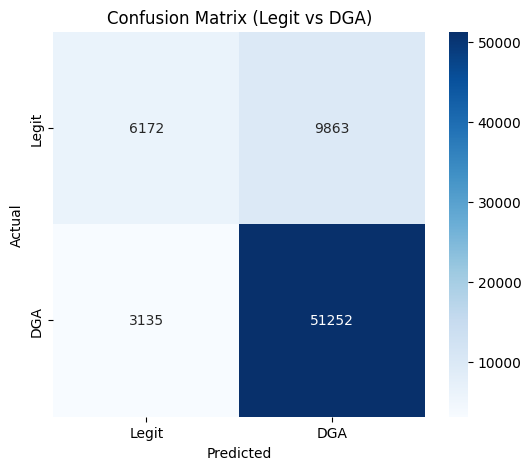

In [62]:
def categorize_labels(labels):
    return ['Legit' if label in [0, 5] else 'DGA' for label in labels]

# Apply the mapping function to both actual and predicted labels
y11_test_mapped = categorize_labels(y11_test)
y11_pred_mapped = categorize_labels(y11_pred)

# Compute the confusion matrix for the categorized labels
c11 = confusion_matrix(y11_test_mapped, y11_pred_mapped, labels=['Legit', 'DGA'])

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(c11, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legit', 'DGA'], 
            yticklabels=['Legit', 'DGA'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Legit vs DGA)')

plt.show()

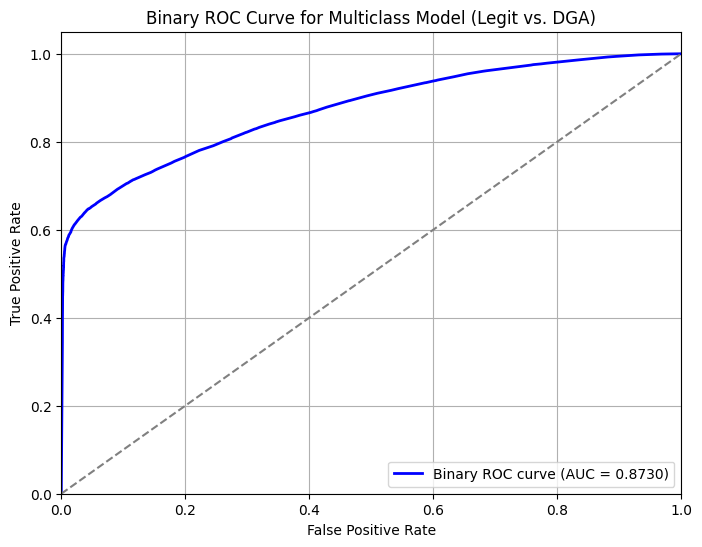

In [63]:
y_test_binary = [1 if label not in [0, 5] else 0 for label in y11_test]  # 'alexa' (0) and 'legit' (5) are 'Legit'

# 2. Calculate binary probabilities: sum probabilities for 'Legit' classes
# Assuming y_pred_proba is the predicted probability matrix from the model
legit_prob = y11_pred_proba[:, 0] + y11_pred_proba[:, 5]  # Probabilities for 'alexa' and 'legit'
dga_prob = 1 - legit_prob  # The remaining probability is for 'DGA'

# 3. Compute ROC curve and AUC for binary classification
fpr, tpr, _ = roc_curve(y_test_binary, dga_prob)
roc_auc = auc(fpr, tpr)

# 4. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Binary ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Binary ROC Curve for Multiclass Model (Legit vs. DGA)')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

In [64]:
positive_label = 'Legit'

# Calculate the metrics with explicit pos_label for binary classification
accuracy = accuracy_score(y11_test_mapped, y11_pred_mapped)
precision = precision_score(y11_test_mapped, y11_pred_mapped, pos_label=positive_label)
f1 = f1_score(y11_test_mapped, y11_pred_mapped, pos_label=positive_label)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8154
Precision: 0.6632
F1 Score: 0.4871


# Use domain entropy only (oversampled)
• used for slides and report
    
    * before reruning

        * ovo roc auc 90%
    
        * accuracy 53%
    
        * binary mapped accuracy 82.3%
    
        * binary mapped auc roc 88.6%
    
        * binary mapped specificity 96.8%
    

In [65]:
# define X
X12 = sliced_df.drop(['domain', 'host', 'subclass','subclass_encoded', 'host_entropy'], axis=1)

In [66]:
# Initialize Random Forest
rf12 = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=20, random_state=42)

# Split into training and testing sets
X12_train, X12_test, y12_train, y12_test = train_test_split(X12, y1, test_size=0.2, random_state=42)

# Train the model on the resampled data
rf12.fit(X12_train, y12_train)

# Predict and get probability scores
y12_pred = rf12.predict(X12_test)
y12_pred_proba = rf12.predict_proba(X12_test)

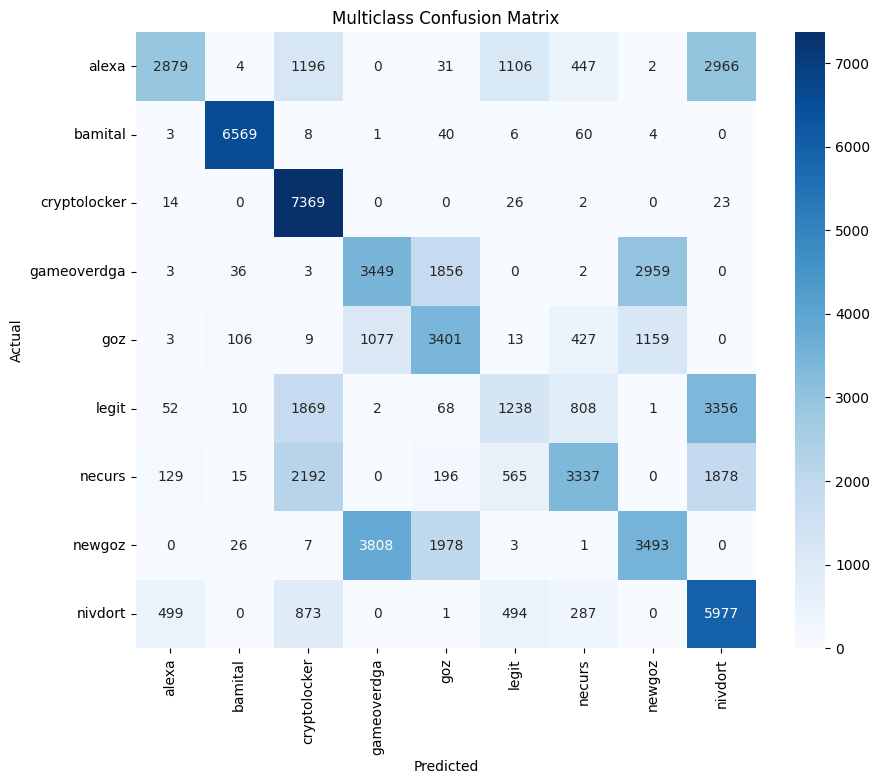

In [67]:
c12 = confusion_matrix(y12_test, y12_pred, labels=list(label_mapping.values()))

# Set up labels using the mapping
class_labels = [key for key in label_mapping.keys()]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(c12, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multiclass Confusion Matrix')

plt.show()

In [68]:
y12_test_binarized = label_binarize(y12_test, classes=np.unique(y12_test))
n_classes = y12_test_binarized.shape[1]

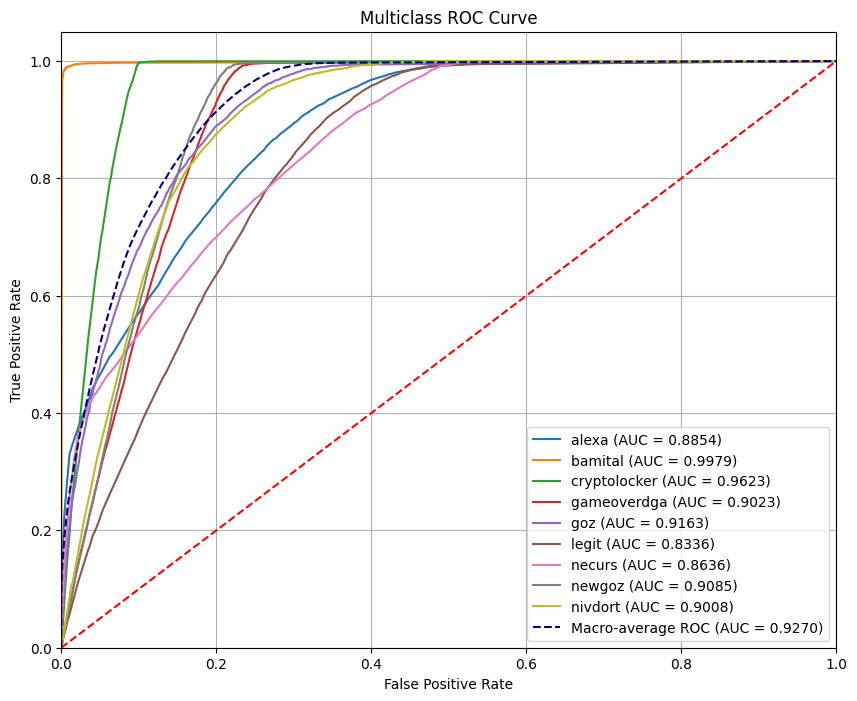

In [69]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y12_test_binarized[:, i], y12_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y12_test_binarized.ravel(), y12_pred_proba.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.4f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='--', label=f'Macro-average ROC (AUC = {roc_auc["macro"]:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()

# Show the plot
plt.show()

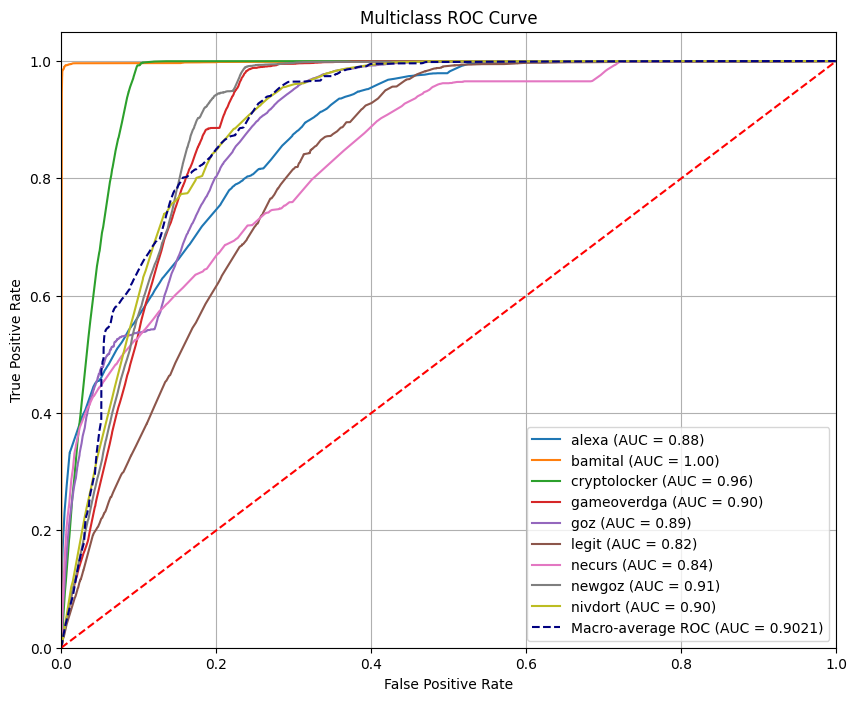

In [70]:
y_train_binarized = label_binarize(y12_train, classes=np.unique(y12_train))
y_test_binarized = label_binarize(y12_test, classes=np.unique(y12_test))
n_classes = y_test_binarized.shape[1]

# Initialize OneVsOneClassifier with your base classifier (e.g., RandomForest)
model = OneVsOneClassifier(RandomForestClassifier(random_state=42))
model.fit(X12_train, y12_train)

# Get predicted probabilities
yovo_scores = model.decision_function(X12_test)
yovo_pred = model.predict(X12_test)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], yovo_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y_test_binarized.ravel(), yovo_scores.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='--', label=f'Macro-average ROC (AUC = {roc_auc["macro"]:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()

# Show the plot
plt.show()

In [72]:
accuracy = accuracy_score(y12_test, y12_pred)

precision = precision_score(y12_test, y12_pred, average="macro")
f1 = f1_score(y12_test, y12_pred, average="macro")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro Avg): {precision:.4f}")
print(f"F1 Score (Macro Avg): {f1:.4f}")

Accuracy: 0.5355
Precision (Macro Avg): 0.5602
F1 Score (Macro Avg): 0.5248


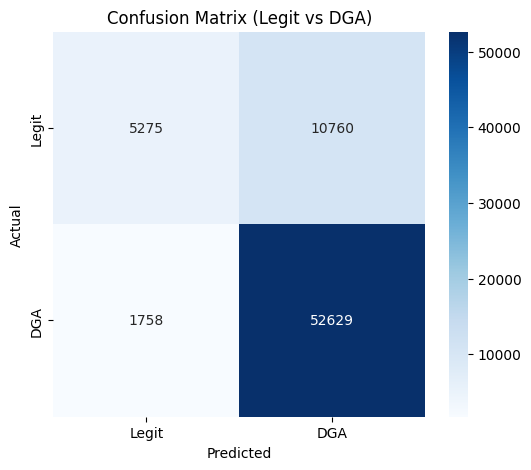

In [73]:
def categorize_labels(labels):
    return ['Legit' if label in [0, 5] else 'DGA' for label in labels]

# Apply the mapping function to both actual and predicted labels
y12_test_mapped = categorize_labels(y12_test)
y12_pred_mapped = categorize_labels(y12_pred)

# Compute the confusion matrix for the categorized labels
c12 = confusion_matrix(y12_test_mapped, y12_pred_mapped, labels=['Legit', 'DGA'])

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(c12, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legit', 'DGA'], 
            yticklabels=['Legit', 'DGA'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Legit vs DGA)')

plt.show()

look for the specificity (true negative rate)

In [74]:
TN = c12[1, 1] 
FP = c12[1, 0] 

specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.9677


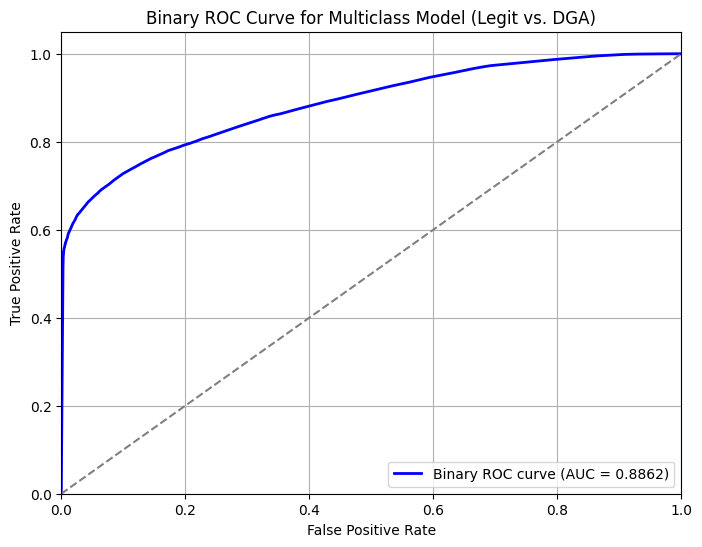

In [75]:
y_test_binary = [1 if label not in [0, 5] else 0 for label in y12_test]  # 'alexa' (0) and 'legit' (5) are 'Legit'

# 2. Calculate binary probabilities: sum probabilities for 'Legit' classes
# Assuming y_pred_proba is the predicted probability matrix from the model
legit_prob = y12_pred_proba[:, 0] + y12_pred_proba[:, 5]  # Probabilities for 'alexa' and 'legit'
dga_prob = 1 - legit_prob  # The remaining probability is for 'DGA'

# 3. Compute ROC curve and AUC for binary classification
fpr, tpr, _ = roc_curve(y_test_binary, dga_prob)
roc_auc = auc(fpr, tpr)

# 4. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Binary ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Binary ROC Curve for Multiclass Model (Legit vs. DGA)')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

In [77]:
positive_label = 'Legit'

# Calculate the metrics with explicit pos_label for binary classification
accuracy = accuracy_score(y12_test_mapped, y12_pred_mapped)
precision = precision_score(y12_test_mapped, y12_pred_mapped, pos_label=positive_label)
f1 = f1_score(y12_test_mapped, y12_pred_mapped, pos_label=positive_label)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8222
Precision: 0.7500
F1 Score: 0.4573


# Use Both host and domain entropy

In [78]:
# define X
X2 = original_df.drop(['domain', 'host', 'subclass','subclass_encoded'], axis=1)

# define y for binary and multiclass respectively
y2 = original_df['subclass_encoded']

In [105]:
# Initialize Random Forest
rf2 = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=20, random_state=42)

# Split into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train the model on the resampled data
rf2.fit(X2_train, y2_train)

# Predict and get probability scores
y2_pred = rf2.predict(X2_test)
y2_pred_proba = rf2.predict_proba(X2_test)

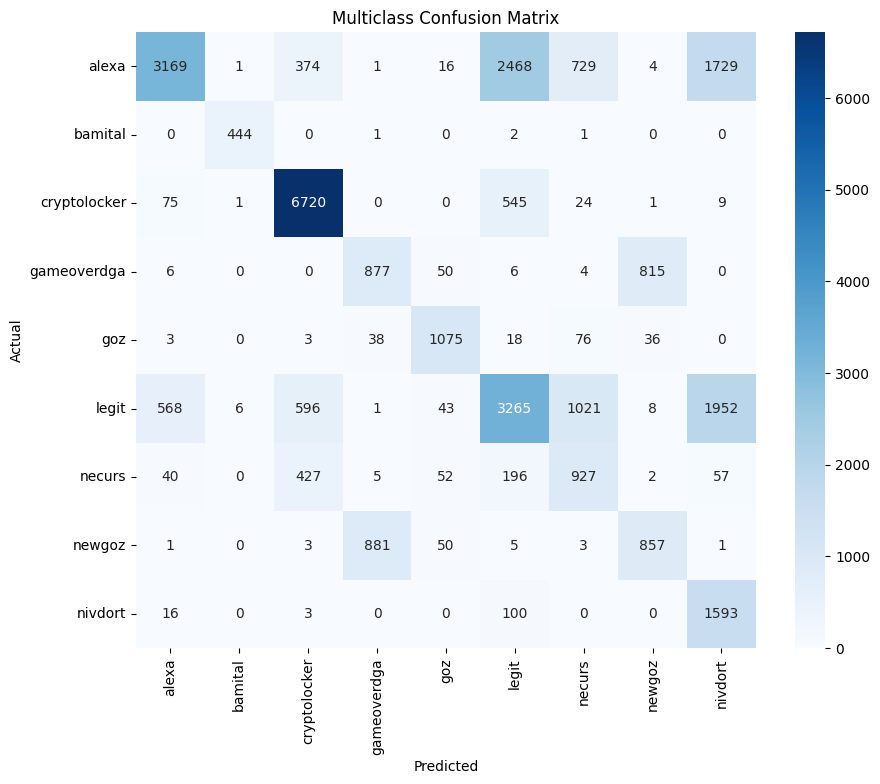

In [106]:
c2 = confusion_matrix(y2_test, y2_pred, labels=list(label_mapping.values()))

# Set up labels using the mapping
class_labels = [key for key in label_mapping.keys()]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(c2, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multiclass Confusion Matrix')

plt.show()

In [107]:
y2_test_binarized = label_binarize(y2_test, classes=np.unique(y2_test))
n_classes = y2_test_binarized.shape[1]

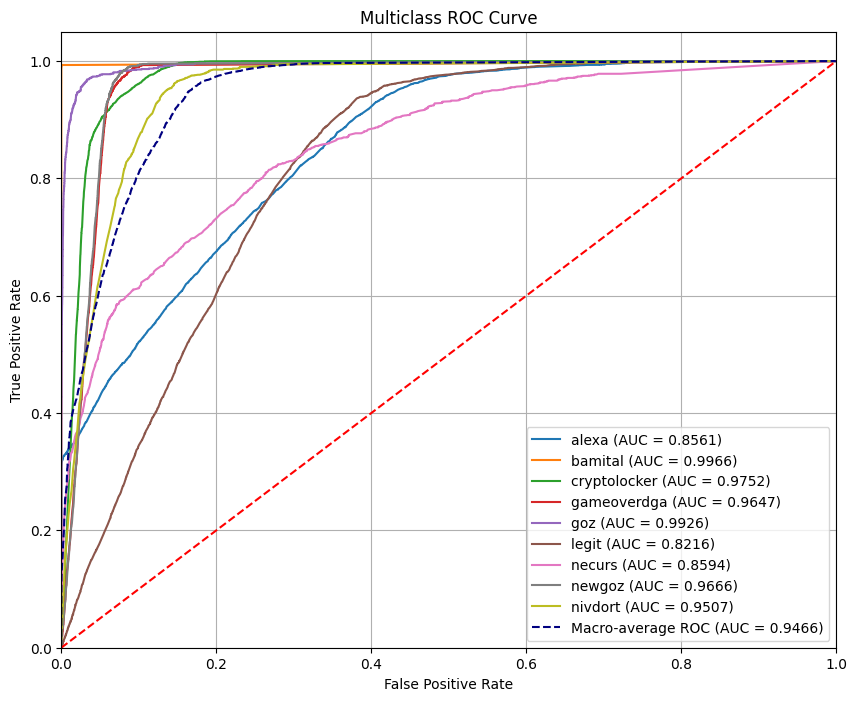

In [108]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y2_test_binarized[:, i], y2_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y2_test_binarized.ravel(), y2_pred_proba.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.4f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='--', label=f'Macro-average ROC (AUC = {roc_auc["macro"]:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()

# Show the plot
plt.show()

In [109]:
accuracy = accuracy_score(y2_test, y2_pred)

precision = precision_score(y2_test, y2_pred, average="macro")
f1 = f1_score(y2_test, y2_pred, average="macro")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro Avg): {precision:.4f}")
print(f"F1 Score (Macro Avg): {f1:.4f}")

Accuracy: 0.5915
Precision (Macro Avg): 0.6190
F1 Score (Macro Avg): 0.6135


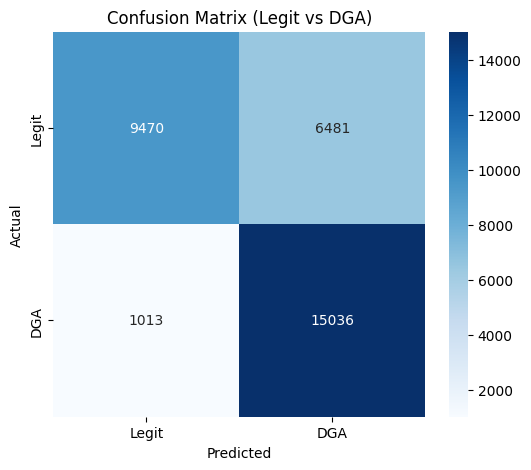

In [111]:
def categorize_labels(labels):
    return ['Legit' if label in [0, 5] else 'DGA' for label in labels]

# Apply the mapping function to both actual and predicted labels
y2_test_mapped = categorize_labels(y2_test)
y2_pred_mapped = categorize_labels(y2_pred)

# Compute the confusion matrix for the categorized labels
c2 = confusion_matrix(y2_test_mapped, y2_pred_mapped, labels=['Legit', 'DGA'])

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(c2, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legit', 'DGA'], 
            yticklabels=['Legit', 'DGA'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Legit vs DGA)')

plt.show()

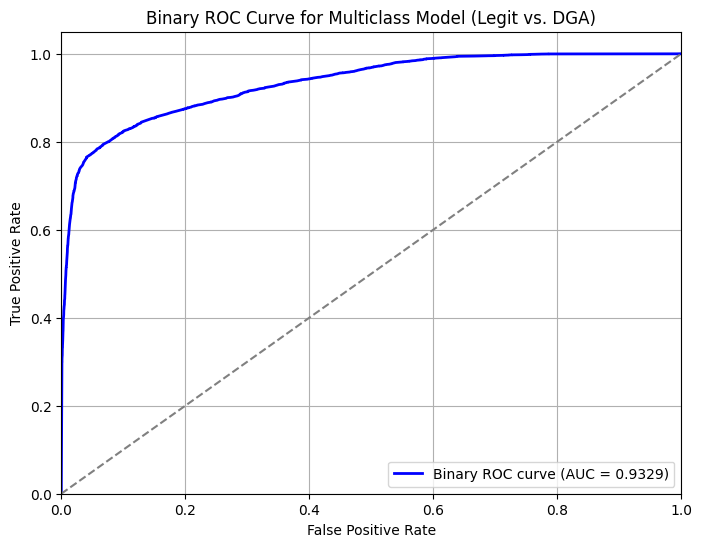

In [112]:
y_test_binary = [1 if label not in [0, 5] else 0 for label in y2_test]  # 'alexa' (0) and 'legit' (5) are 'Legit'

# 2. Calculate binary probabilities: sum probabilities for 'Legit' classes
# Assuming y_pred_proba is the predicted probability matrix from the model
legit_prob = y2_pred_proba[:, 0] + y2_pred_proba[:, 5]  # Probabilities for 'alexa' and 'legit'
dga_prob = 1 - legit_prob  # The remaining probability is for 'DGA'

# 3. Compute ROC curve and AUC for binary classification
fpr, tpr, _ = roc_curve(y_test_binary, dga_prob)
roc_auc = auc(fpr, tpr)

# 4. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Binary ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Binary ROC Curve for Multiclass Model (Legit vs. DGA)')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

In [113]:
positive_label = 'Legit'

# Calculate the metrics with explicit pos_label for binary classification
accuracy = accuracy_score(y2_test_mapped, y2_pred_mapped)
precision = precision_score(y2_test_mapped, y2_pred_mapped, pos_label=positive_label)
f1 = f1_score(y2_test_mapped, y2_pred_mapped, pos_label=positive_label)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7658
Precision: 0.9034
F1 Score: 0.7165


# Use host entropy only

In [87]:
# define X
X21 = original_df.drop(['domain', 'host', 'subclass','subclass_encoded', 'domain_entropy'], axis=1)

In [88]:
# Initialize Random Forest
rf21 = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=20, random_state=42)

# Split into training and testing sets
X21_train, X21_test, y21_train, y21_test = train_test_split(X21, y2, test_size=0.2, random_state=42)

# Train the model on the resampled data
rf21.fit(X21_train, y21_train)

# Predict and get probability scores
y21_pred = rf21.predict(X21_test)
y21_pred_proba = rf21.predict_proba(X21_test)

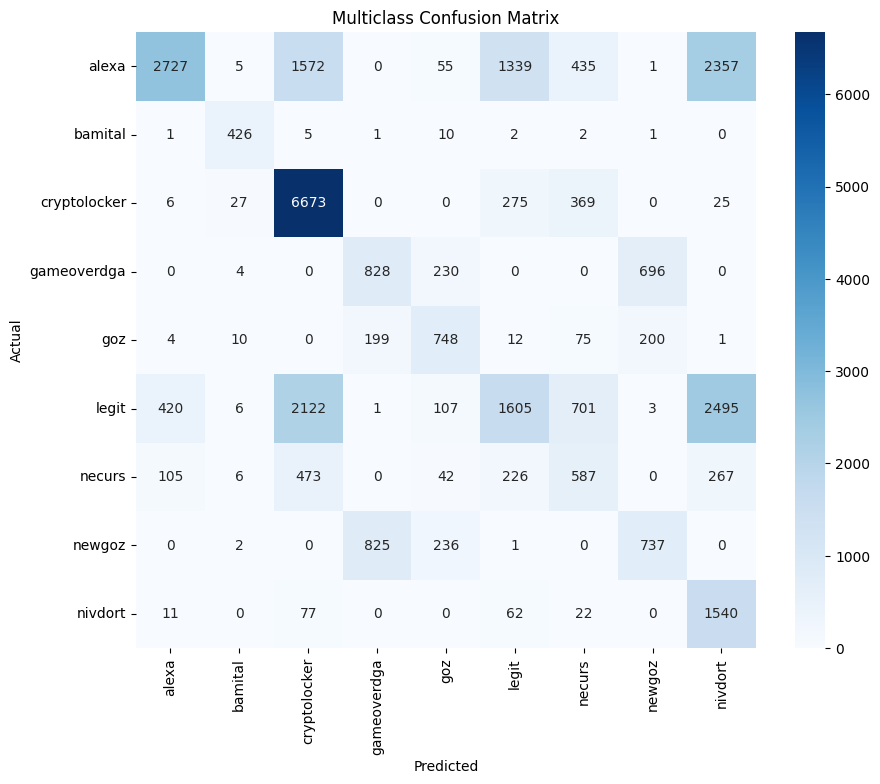

In [89]:
c21 = confusion_matrix(y21_test, y21_pred, labels=list(label_mapping.values()))

# Set up labels using the mapping
class_labels = [key for key in label_mapping.keys()]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(c21, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multiclass Confusion Matrix')

plt.show()

In [90]:
y21_test_binarized = label_binarize(y21_test, classes=np.unique(y21_test))
n_classes = y21_test_binarized.shape[1]

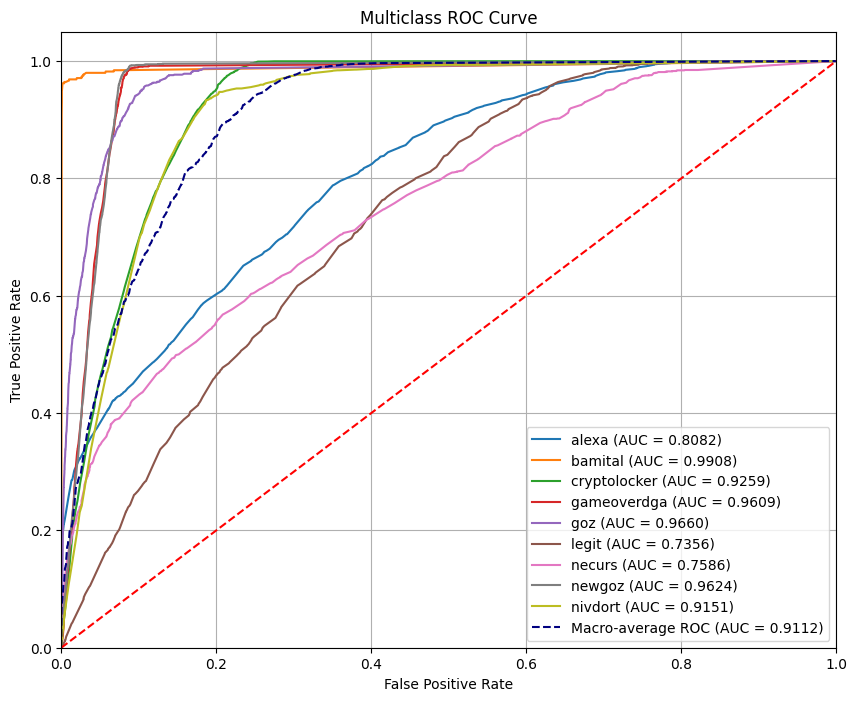

In [91]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y21_test_binarized[:, i], y21_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y21_test_binarized.ravel(), y21_pred_proba.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.4f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='--', label=f'Macro-average ROC (AUC = {roc_auc["macro"]:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()

# Show the plot
plt.show()

In [92]:
accuracy = accuracy_score(y21_test, y21_pred)

precision = precision_score(y21_test, y21_pred, average="macro")
f1 = f1_score(y21_test, y21_pred, average="macro")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro Avg): {precision:.4f}")
print(f"F1 Score (Macro Avg): {f1:.4f}")

Accuracy: 0.4960
Precision (Macro Avg): 0.5216
F1 Score (Macro Avg): 0.5013


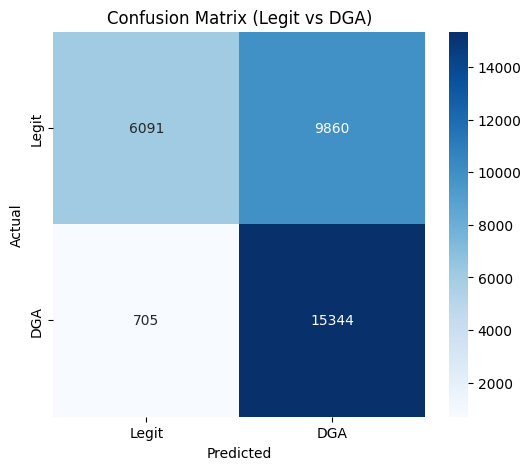

In [93]:
def categorize_labels(labels):
    return ['Legit' if label in [0, 5] else 'DGA' for label in labels]

# Apply the mapping function to both actual and predicted labels
y21_test_mapped = categorize_labels(y21_test)
y21_pred_mapped = categorize_labels(y21_pred)

# Compute the confusion matrix for the categorized labels
c21 = confusion_matrix(y21_test_mapped, y21_pred_mapped, labels=['Legit', 'DGA'])

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(c21, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legit', 'DGA'], 
            yticklabels=['Legit', 'DGA'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Legit vs DGA)')

plt.show()

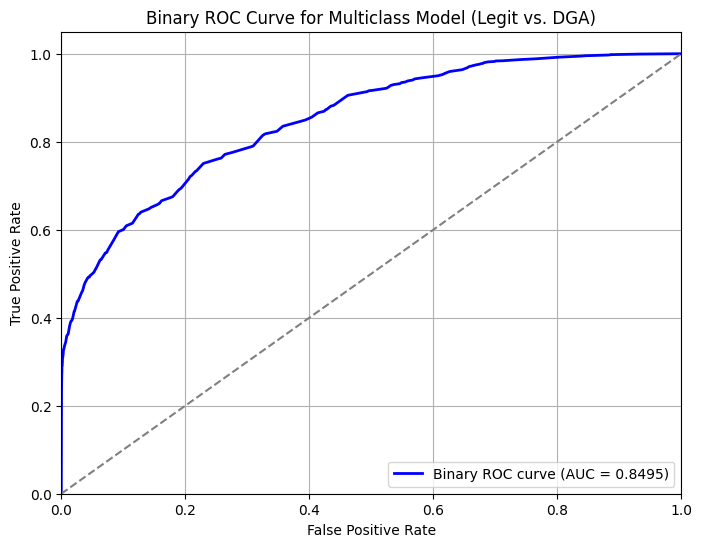

In [94]:
y_test_binary = [1 if label not in [0, 5] else 0 for label in y21_test]  # 'alexa' (0) and 'legit' (5) are 'Legit'

# 2. Calculate binary probabilities: sum probabilities for 'Legit' classes
# Assuming y_pred_proba is the predicted probability matrix from the model
legit_prob = y21_pred_proba[:, 0] + y21_pred_proba[:, 5]  # Probabilities for 'alexa' and 'legit'
dga_prob = 1 - legit_prob  # The remaining probability is for 'DGA'

# 3. Compute ROC curve and AUC for binary classification
fpr, tpr, _ = roc_curve(y_test_binary, dga_prob)
roc_auc = auc(fpr, tpr)

# 4. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Binary ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Binary ROC Curve for Multiclass Model (Legit vs. DGA)')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

In [95]:
positive_label = 'Legit'

# Calculate the metrics with explicit pos_label for binary classification
accuracy = accuracy_score(y21_test_mapped, y21_pred_mapped)
precision = precision_score(y21_test_mapped, y21_pred_mapped, pos_label=positive_label)
f1 = f1_score(y21_test_mapped, y21_pred_mapped, pos_label=positive_label)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6698
Precision: 0.8963
F1 Score: 0.5355


# Use domain entropy only

In [96]:
# define X
X22 = original_df.drop(['domain', 'host', 'subclass','subclass_encoded', 'host_entropy'], axis=1)

In [97]:
# Initialize Random Forest
rf22 = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=20, random_state=42)

# Split into training and testing sets
X22_train, X22_test, y22_train, y22_test = train_test_split(X22, y2, test_size=0.2, random_state=42)

# Train the model on the resampled data
rf22.fit(X22_train, y22_train)

# Predict and get probability scores
y22_pred = rf22.predict(X22_test)
y22_pred_proba = rf22.predict_proba(X22_test)

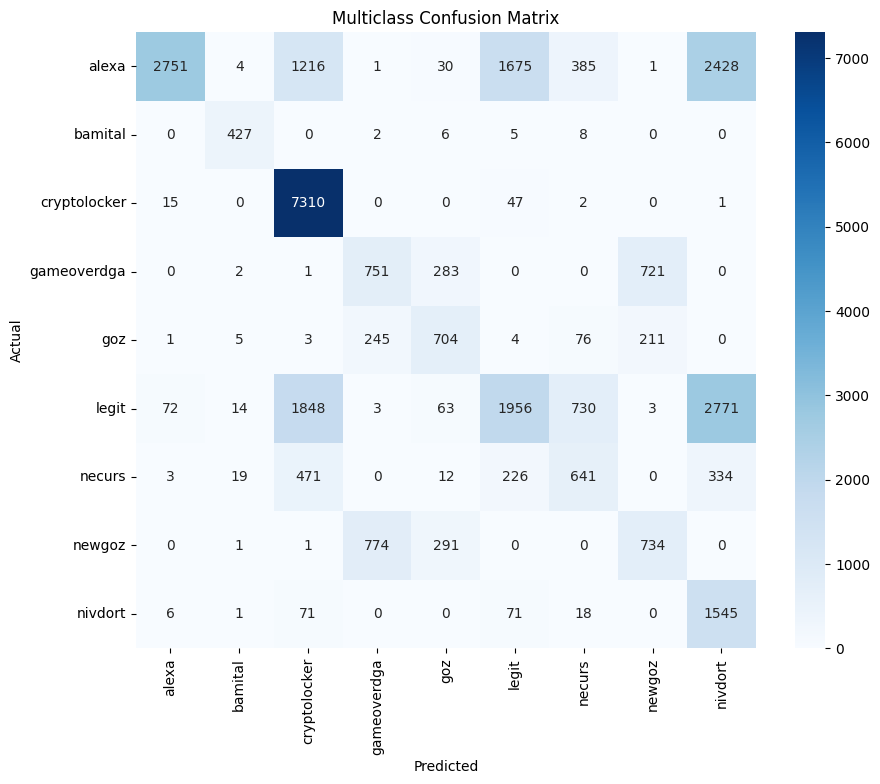

In [98]:
c22 = confusion_matrix(y22_test, y22_pred, labels=list(label_mapping.values()))

# Set up labels using the mapping
class_labels = [key for key in label_mapping.keys()]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(c22, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multiclass Confusion Matrix')

plt.show()

In [99]:
y22_test_binarized = label_binarize(y22_test, classes=np.unique(y22_test))
n_classes = y22_test_binarized.shape[1]

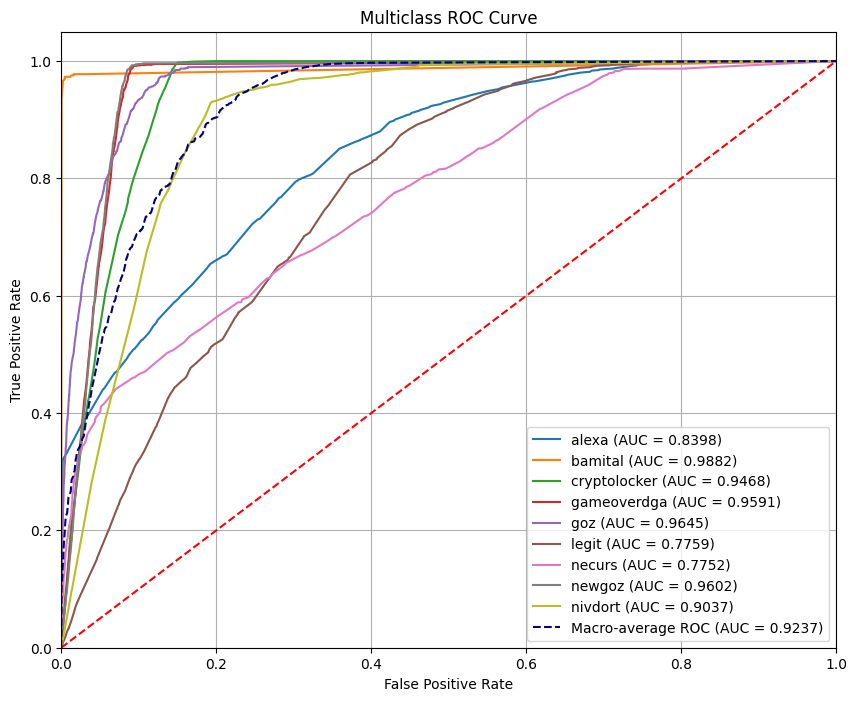

In [100]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y22_test_binarized[:, i], y22_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["macro"], tpr["macro"], _ = roc_curve(y22_test_binarized.ravel(), y22_pred_proba.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.4f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='--', label=f'Macro-average ROC (AUC = {roc_auc["macro"]:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()

# Show the plot
plt.show()

In [101]:
accuracy = accuracy_score(y22_test, y22_pred)

precision = precision_score(y22_test, y22_pred, average="macro")
f1 = f1_score(y22_test, y22_pred, average="macro")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro Avg): {precision:.4f}")
print(f"F1 Score (Macro Avg): {f1:.4f}")

Accuracy: 0.5256
Precision (Macro Avg): 0.5512
F1 Score (Macro Avg): 0.5162


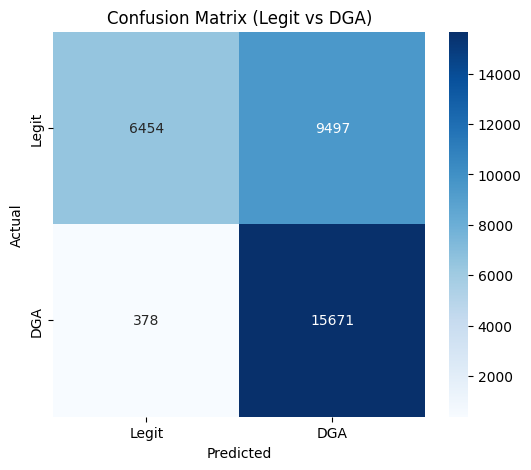

In [102]:
def categorize_labels(labels):
    return ['Legit' if label in [0, 5] else 'DGA' for label in labels]

# Apply the mapping function to both actual and predicted labels
y22_test_mapped = categorize_labels(y22_test)
y22_pred_mapped = categorize_labels(y22_pred)

# Compute the confusion matrix for the categorized labels
c22 = confusion_matrix(y22_test_mapped, y22_pred_mapped, labels=['Legit', 'DGA'])

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(c22, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legit', 'DGA'], 
            yticklabels=['Legit', 'DGA'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Legit vs DGA)')

plt.show()

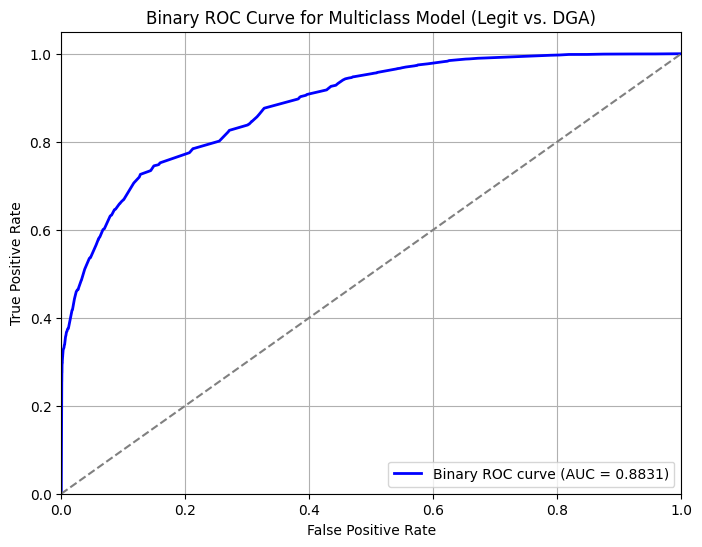

In [103]:
y_test_binary = [1 if label not in [0, 5] else 0 for label in y22_test]  # 'alexa' (0) and 'legit' (5) are 'Legit'

# 2. Calculate binary probabilities: sum probabilities for 'Legit' classes
# Assuming y_pred_proba is the predicted probability matrix from the model
legit_prob = y22_pred_proba[:, 0] + y22_pred_proba[:, 5]  # Probabilities for 'alexa' and 'legit'
dga_prob = 1 - legit_prob  # The remaining probability is for 'DGA'

# 3. Compute ROC curve and AUC for binary classification
fpr, tpr, _ = roc_curve(y_test_binary, dga_prob)
roc_auc = auc(fpr, tpr)

# 4. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Binary ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Binary ROC Curve for Multiclass Model (Legit vs. DGA)')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

In [104]:
positive_label = 'Legit'

# Calculate the metrics with explicit pos_label for binary classification
accuracy = accuracy_score(y22_test_mapped, y22_pred_mapped)
precision = precision_score(y22_test_mapped, y22_pred_mapped, pos_label=positive_label)
f1 = f1_score(y22_test_mapped, y22_pred_mapped, pos_label=positive_label)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6914
Precision: 0.9447
F1 Score: 0.5666
